# SkillFactory
## HW 3 Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [58]:
#df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [2]:
#df_descr

Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [35]:
df_train = pd.read_csv('hw3_kaggle/train.csv', sep=',', encoding='utf8', index_col='_id')

In [36]:
df_train.shape

(24712, 21)

In [37]:
df_test = pd.read_csv('hw3_kaggle/test.csv', sep=',', encoding='utf8', index_col='_id')

In [38]:
df_test.shape

(16476, 20)

In [39]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,,,,,,
df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [40]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [41]:
df = df_test.append(df_train).reset_index(drop=True)

In [42]:
df.shape

(41188, 22)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
sample            41188 non-null object
target            24712 non-null float64
dtypes: fl

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [44]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object' and i != '_id': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'housemaid', 'management', 'retired', 'technician', 'unemployed', 'student', 'entrepreneur', 'self-employed', 'services', 'blue-collar', 'admin.', 'unknown'}


marital
{'married', 'single', 'divorced', 'unknown'}


education
{'university.degree', 'illiterate', 'high.school', 'basic.4y', 'basic.6y', 'professional.course', 'basic.9y', 'unknown'}


default
{'no', 'yes', 'unknown'}


housing
{'no', 'yes', 'unknown'}


loan
{'no', 'yes', 'unknown'}


contact
{'telephone', 'cellular'}


month
{'dec', 'aug', 'oct', 'may', 'mar', 'jul', 'sep', 'apr', 'nov', 'jun'}


day_of_week
{'fri', 'thu', 'mon', 'wed', 'tue'}


poutcome
{'success', 'nonexistent', 'failure'}


sample
{'train'}




Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [107]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
# перекодируем

In [18]:
#df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
# проверяем

In [108]:
'''for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку'''

"for i in df.columns: # перебираем все столбцы\n    if str(df[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        print('\n') # выводим пустую строку"

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [48]:
#df.info()

In [47]:
#df.median()

In [46]:
#df.groupby('WORK_TIME').count()

In [109]:
'''df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')'''

"df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')"

### Теперь ваше небольшое исследование

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Да, есть - это все object кроме тех, которые на самом деле являются числами 

Их можно разбить по столбцам (количество столбцов = количеству вариантов) и заменить на 1 и 0 

Пример команды: df = pd.get_dummies(df)

Применять можно только после превращения числоваых столбцов из обджект в флоат и без столбца sample

#### Задание 3. Фунция предобработки

In [110]:
#df.info()

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [56]:
'''for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        #print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print('\n') # выводим пустую строку'''

"for i in df.columns: # перебираем все столбцы\n    if str(df[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        #print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        #print('\n') # выводим пустую строку"

In [178]:
'''def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
                               
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True) # эта строка портит sample теперь норм
                               
    df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median(), inplace=True) 
                               
    df_output['GEN_INDUSTRY'].fillna('GEN_INDUSTRY_other' , inplace=True) 
    df_output['GEN_TITLE'].fillna('GEN_TITLE_other' , inplace=True)
    df_output['ORG_TP_STATE'].fillna('ORG_TP_STATE_other' , inplace=True)
    df_output['ORG_TP_FCAPITAL'].fillna('ORG_TP_FCAPITAL_other' , inplace=True)
    df_output['JOB_DIR'].fillna('JOB_DIR_other' , inplace=True)
    df_output['TP_PROVINCE'].fillna('TP_PROVINCE_other' , inplace=True)
    df_output['REGION_NM'].fillna('REGION_NM_other' , inplace=True)
    
    
                           
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS',  'GEN_INDUSTRY',\
                                                   'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',\
                                                   'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE',\
                                                   'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', \
                                                   'TP_PROVINCE', 'REGION_NM',])            
    
    # предпоследний абзац из 7 строк добавляет в sample лишние значения
                            
    return df_output'''

In [ ]:
#df = df.drop(['AGREEMENT_RK'], axis=1)

In [45]:
df = pd.get_dummies(df, columns=['job', 'marital',  'education',\
                                                   'default', 'housing', 'loan',\
                                                   'contact', 'month', 'day_of_week',\
                                                   'poutcome' ])    

In [179]:
'''#df_preproc = df.pipe(preproc_data)

df_preproc = preproc_data(df)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)'''

In [46]:
#df_preproc = df.pipe(preproc_data)

df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)

In [47]:
df.groupby('sample').count()
# почемуто после обработки функцией столбец sample портится
#df.groupby('WORK_TIME').count()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
sample,,,,,,,,,,,,,,,,,,,,,
test,16476,16476,16476,16476,16476,16476,16476,16476,16476,16476,...,16476,16476,16476,16476,16476,16476,16476,16476,16476,16476
train,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712,...,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712


In [85]:
#df_test_preproc.info()

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [48]:
y = df_train_preproc['target']
y_test = df_test_preproc['target']

X = df_train_preproc.drop(['target'], axis=1)
X_test = df_test_preproc.drop(['target'], axis=1)


In [80]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: target, dtype: float64

#### Задание 5. Обучение и оценка качества разных моделей

In [50]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [86]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

## Your Code Here



In [33]:
'''X_train = X_train.drop(['_id'], axis=1)
df = df.drop(['_id'], axis=1)'''

### Decision Tree Classifier

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_train_test)

accuracy_score(y_train_test, predict_dtc)

0.8875101159967629

In [53]:
predict_proba_dtc = dtc.predict_proba(X_train_test)
predict_proba_dtc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Random Forest Classifier

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_train_test)

accuracy_score(y_train_test, predict_rfc)

0.9058537901267871

In [59]:
predict_proba_rfc = rfc.predict_proba(X_train_test)
predict_proba_rfc

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ]])

### Logistic Regression

In [55]:
lrs = LogisticRegression()
lrs.fit(X_train, y_train)
predict_lrs = lrs.predict(X_train_test)

accuracy_score(y_train_test, predict_lrs)

0.9107094685729701

In [62]:
predict_proba_lrs = lrs.predict_proba(X_train_test)
predict_proba_lrs

array([[0.4267456 , 0.5732544 ],
       [0.99524686, 0.00475314],
       [0.99467464, 0.00532536],
       ...,
       [0.98374046, 0.01625954],
       [0.88303952, 0.11696048],
       [0.98784456, 0.01215544]])

### кнн

In [96]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_train_test)

accuracy_score(y_train_test, predict_knn)

0.9115187483140006

In [97]:
predict_proba_knn = knn.predict_proba(X_train_test)
predict_proba_knn

array([[0.42, 0.58],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.98, 0.02],
       [0.75, 0.25],
       [0.99, 0.01]])

In [56]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Your Code Here
    


### Decision Tree Classifier

In [57]:
accuracy_score(y_train_test, predict_dtc)
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_train_test, predict_proba_dtc[:,1])

### Random Forest Classifier

In [60]:
accuracy_score(y_train_test, predict_rfc)
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_train_test, predict_proba_rfc[:,1])

### Logistic Regression

In [63]:
accuracy_score(y_train_test, predict_lrs)
precision_lrs, recall_lrs, thresholds_lrs = precision_recall_curve(y_train_test, predict_proba_lrs[:,1])

(-0.01, 1.01)

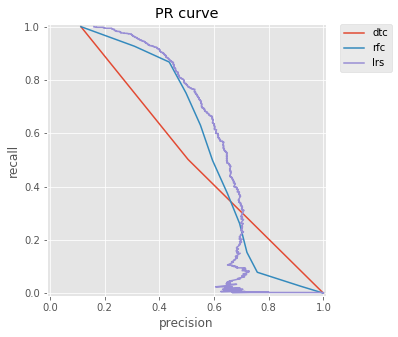

In [65]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc, label="dtc")
plt.plot(precision_rfc, recall_rfc, label="rfc")
plt.plot(precision_lrs, recall_lrs, label="lrs")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

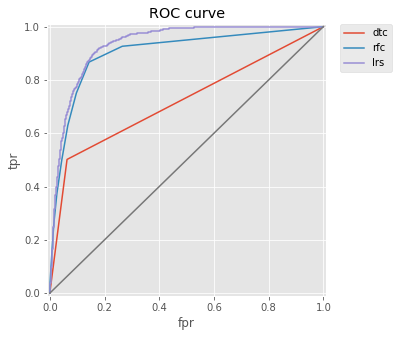

In [66]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_train_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_test, predict_proba_rfc[:,1])
fpr_lrs, tpr_lrs, thresholds_lrs = roc_curve(y_train_test, predict_proba_lrs[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc, label="dtc")
plt.plot(fpr_rfc, tpr_rfc, label="rfc")
plt.plot(fpr_lrs, tpr_lrs, label="lrs")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

# Дерево принятия решений

In [67]:
roc_auc_score(y_train_test, predict_proba_dtc[:,1])

0.7193876252334885

In [68]:
roc_auc_score(y_train_test, predict_proba_rfc[:,1])

0.9020026346037163

# Логистическая регрессия

In [69]:
roc_auc_score(y_train_test, predict_proba_lrs[:,1])

0.9330867702419399

# кнн

In [98]:
roc_auc_score(y_train_test, predict_proba_knn[:,1])

0.9284996821830995

In [71]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

'''Зачем нужна строка сверху?'''
## Your Code Here
cv

StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

### Decision Tree Classifier

In [72]:
dtc = DecisionTreeClassifier()
a = cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
a

array([0.76263919, 0.74074156, 0.7150317 , 0.7082555 , 0.72005256,
       0.74271545, 0.75623806, 0.73019942, 0.71624088, 0.73199798])

In [73]:
np.mean(a)

0.7324112284603065

### Random Forest Classifier

In [74]:
rfc = RandomForestClassifier()
b = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
b

array([0.91323484, 0.89687618, 0.91717374, 0.90714018, 0.91209649,
       0.9138297 , 0.91383051, 0.91261881, 0.89622417, 0.90648631])

In [75]:
np.mean(b)

0.9089510933074321

### Logistic Regression

In [76]:
lrs = LogisticRegression()
c = cross_val_score(
    lrs,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
c

array([0.92443209, 0.92182686, 0.93226738, 0.93918741, 0.92206221,
       0.91858632, 0.94565118, 0.93237016, 0.92350864, 0.93033529])

In [77]:
np.mean(c)

0.9290227552460143

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [99]:
lrs = LogisticRegression()
lrs.fit(X, y)
predict_lrs = lrs.predict(X_test)

y_hat = lrs.predict_proba(X_test)[:, 1]
#accuracy_score(y_test, predict_lrs)

In [102]:
#test_ids = X_test['_id']

In [104]:
#df_submission = pd.Series(index=test_ids, data=y_hat) 
df_test.loc[:, 'prediction'] = y_hat

In [112]:
df_submission = df_test['prediction'
                       ]
#y = df_train_preproc['target']

KeyError: ('age', 'prediction')

In [108]:
df_submission1.to_csv('submission_nikonov.csv')

In [110]:
df_submission.head()

_id
66810d8e6bf2b41c880a7bc6c8a1e295    0.061178
ccac3879652b08cb8b44c1920fd93afa    0.009563
fcccab4d7a76f70647f015f2c84c2af8    0.014565
ed8399278c30678dab739045fa12b440    0.035990
1d4d62ac5cabcb48bac7112813f290cb    0.021344
Name: prediction, dtype: float64

In [113]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,sample,prediction
_id,,,,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,test,0.061178
ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,test,0.009563
fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,test,0.014565
ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,test,0.035990
1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,test,0.021344


In [83]:
predict_lrs

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
y_hat

array([0.06117793, 0.00956332, 0.01456544, ..., 0.00784299, 0.01530134,
       0.004723  ])

In [245]:
predict_proba_lrs = lrs.predict_proba(X_test)
predict_proba_lrs

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[0.87512698, 0.12487302],
       [0.94062466, 0.05937534],
       [0.8257333 , 0.1742667 ],
       ...,
       [0.84162998, 0.15837002],
       [0.92890164, 0.07109836],
       [0.83498321, 0.16501679]])

In [ ]:
# Померить roc_auc на тесте


In [246]:
roc_auc_score(y_test, predict_proba_lrs[:,1])

0.6434897090751194